# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
#1.2 BTC and 5.3 ETH
tickers =["BTC" , "ETH"]

# Set current amount of holdings
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc = requests.get(btc_url)


In [7]:
# Fetch current ETH price
# YOUR CODE HERE!
response_data_eth = requests.get(eth_url)

In [8]:
# Compute current value of my crpto
# YOUR CODE HERE!


In [9]:
#Get response status code for BTC
print(response_data_btc)

<Response [200]>


In [10]:
#Get response status code for ETH
print(response_data_eth)

<Response [200]>


In [12]:
import json

In [13]:
btc_data = requests.get(btc_url).json()
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18736281, 'total_supply': 18736281, 'max_supply': 21000000, 'quotes': {'USD': {'price': 39120.0, 'volume_24h': 35340605664, 'market_cap': 732972049091, 'percentage_change_1h': -0.0644702713241037, 'percentage_change_24h': -2.65862059449878, 'percentage_change_7d': 16.5786292478028, 'percent_change_1h': -0.0644702713241037, 'percent_change_24h': -2.65862059449878, 'percent_change_7d': 16.5786292478028}, 'CAD': {'price': 47648.16, 'volume_24h': 43044857698.752, 'market_cap': 892759955792.838, 'percent_change_1h': -0.0644702713241037, 'percent_change_24h': -2.65862059449878, 'percent_change_7d': 16.5786292478028}}, 'last_updated': 1623847799}}, 'metadata': {'timestamp': 1623847799, 'num_cryptocurrencies': 1288, 'error': None}}


In [14]:
eth_data = requests.get(eth_url).json()
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 116314322, 'total_supply': 116314322, 'max_supply': 0, 'quotes': {'USD': {'price': 2454.09, 'volume_24h': 24797044015, 'market_cap': 284866781423, 'percentage_change_1h': -0.500929297479017, 'percentage_change_24h': -5.34637656420486, 'percentage_change_7d': -2.92439585185294, 'percent_change_1h': -0.500929297479017, 'percent_change_24h': -5.34637656420486, 'percent_change_7d': -2.92439585185294}, 'CAD': {'price': 2989.08162, 'volume_24h': 30202799610.27, 'market_cap': 346967739773.214, 'percent_change_1h': -0.500929297479017, 'percent_change_24h': -5.34637656420486, 'percent_change_7d': -2.92439585185294}}, 'last_updated': 1623847795}}, 'metadata': {'timestamp': 1623847795, 'num_cryptocurrencies': 1288, 'error': None}}


In [15]:
#Convert output to JSON
btc_data = response_data_btc.json()
eth_data = response_data_eth.json()

In [16]:
btc_name = btc_data['data']['1']['name']


In [17]:
eth_name = eth_data['data']['1027']['name']


In [18]:
# Use json.dumps with argument indent=4 to format data



In [19]:
print(json.dumps(btc_name,indent=4))
btc_price = btc_data['data']['1']['quotes']['CAD']['price']
print(btc_price)


"Bitcoin"
47648.16


In [20]:
print(json.dumps(eth_name,indent=4))
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']
print(eth_price)


"Ethereum"
2989.08162


In [21]:
#Define my BTC Value
my_btc_value = my_btc * btc_price



In [22]:
#Define my Eth Value
my_eth_value = my_eth  * eth_price


In [23]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57177.79
The current value of your 5.3 ETH is $15842.13


In [24]:
#My Crypto Wallet
crypto_value = my_btc_value + my_eth_value
print(crypto_value)

73019.92458600001


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [25]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [26]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



In [27]:
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2" )





In [28]:
# Format current date as ISO format(Not to run for now)
# YOUR CODE HERE!

# Set the tickers


# Set timeframe to '1D' for Alpaca API


# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

In [29]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


In [30]:
# Set start and end datetimes of 3 years, between now and 1000 days ago.

start_date = pd.Timestamp("2018-05-01", tz="America/New_York").isoformat()

end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()


In [31]:
# Get 3 years worth of historical price data for AGG and SPY
df_ticker = api.get_barset(tickers , timeframe, start = start_date, end= end_date, limit = 1000).df
df_ticker.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2018-05-01 00:00:00-04:00  105.73  105.79  105.60  105.65  2478664.0  263.90   
2018-05-02 00:00:00-04:00  105.70  105.78  105.62  105.65  1987640.0  264.76   
2018-05-03 00:00:00-04:00  105.82  105.95  105.78  105.80  4236471.0  262.26   
2018-05-04 00:00:00-04:00  105.92  105.93  105.71  105.86  1979610.0  261.48   
2018-05-07 00:00:00-04:00  105.88  105.88  105.77  105.80  1282671.0  266.90   

                                                                
                               high     low    close    volume  
time                                                            
2018-05-01 00:00:00-04:00  265.1000  262.11  264.990  54741086  
2018-05-02 00:00:00-04:00  265.6800  262.76  263.200  57707909  
2018-05-03 00:00:00-04:00  263.3600  259.05  262.575  99237468  
2018-05-04 00:00:00-04:00  266.7892  261.15  266.000  60836486  
2018-05-07 00:00:00-04:00  268.0200  266.11  266.900  41038098

In [32]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices = pd.DataFrame()

#Fetch the closing prices of AGG and SPY
df_closing_prices ["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices ["SPY"] = df_ticker["SPY"]["close"]


In [33]:
#Drop the time component of the date

df_closing_prices.index = df_closing_prices.index.date
df_closing_prices.tail()
#spy_close_price.head()

,AGG,SPY
2021-04-26,114.65,417.64
2021-04-27,114.37,417.48
2021-04-28,114.44,417.35
2021-04-29,114.37,419.98
2021-04-30,114.50,417.30


In [34]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price= df_closing_prices.iloc[-1,-0]
spy_close_price= df_closing_prices.iloc[-1,-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.5
Current SPY closing price: $417.3


In [35]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.00
The current value of your 200 AGG shares is $22900.00


In [36]:
#Define my shares protfolio value
shares_value = my_agg_value + my_spy_value
print(shares_value)

43765.0


### Savings Health Analysis

In [51]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000


In [52]:
# Consolidate financial assets data
# YOUR CODE HERE!

#Assign 'y' as a variable that contains financial assets data

y = [["Crypto", (crypto_value)], ["Shares", (shares_value )] ]

print(y)


[['Crypto', 73019.92458600001], ['Shares', 43765.0]]


In [53]:
from pandas import DataFrame
df_assets = DataFrame (y)
df_assets.rename(columns={0: "" , 1: 'amount'}, inplace = True)
df_assets.set_index([""], inplace = True)


# Display savings DataFrame

df_assets.sort_index()


,amount
,
Crypto,73019.924586
Shares,43765.000000


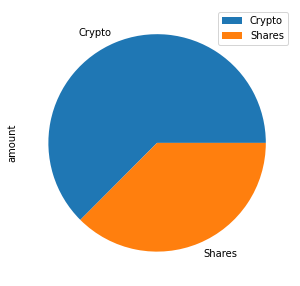

In [54]:
# Plot savings pie chart
# YOUR CODE HERE!

plot= df_assets.plot.pie (subplots=True, figsize=(5,5))

In [51]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

# YOUR CODE HERE!


# Validate saving health
# YOUR CODE HERE!

In [58]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

36000


In [49]:
#Add Cumulative column in savings dataframe
# YOUR CODE HERE!
df_savings = df_assets
df_savings['cumsum']= df_savings['amount'].cumsum() 

df_savings.head()

,amount,cumsum
,,
Crypto,73019.924586,73019.924586
Shares,43765.000000,116784.924586


In [56]:
# Calculate total amount of savings

# YOUR CODE HERE!
total_savings = df_savings.iloc[-1,1]
print(total_savings)


116784.92458600001


In [61]:
# Validate saving health
# YOUR CODE HERE!
 
#if (df_savings.iloc[-1,1] > emergency_fund):
if (total_savings > emergency_fund):
    print("Congratulations! you have enough money in your emergency fund")
elif (total_savings == emergency_fund):
    print(f"Congrats on reaching the financial goal")
else: 
    print("(total_savings- [emergency_fund]" & f"away from reaching the goal")

Congratulations! you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [63]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [64]:
# Get 5 years' worth of historical data for SPY and AGG
#df_stock_data = api.get_barset(tickers,timeframe,start=start_date, end=end_date,limit=1000).df
# (use a limit=1000 parameter to call the most recent 1000 days of data)
#Set the ticker information


# YOUR CODE HERE!
df_stock_data = api.get_barset(tickers,timeframe,start=start_date, end=end_date,limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [65]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear =MCSimulation(portfolio_data=df_stock_data, weights = [.40, .60] , num_simulation = 500 , num_trading_days = 252 * 30)

In [66]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [68]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008849,1.023716,1.004092,0.997391,1.002060,1.007349,0.998111,0.993140,1.005079,0.993563,...,1.010780,1.002043,0.997739,1.011941,0.993496,1.012298,1.015010,1.001192,1.009108,1.010652
2,1.016213,1.032725,1.001852,0.995555,0.995907,1.009724,0.998675,0.993385,1.025173,0.989868,...,1.011948,1.004584,0.984787,1.012777,0.985578,1.006065,1.012477,1.003644,1.013244,0.995119
3,1.015986,1.035315,0.998496,0.988708,0.990690,0.999025,0.987334,1.005279,1.021599,0.993839,...,1.031935,1.001886,0.996996,1.010464,0.979582,1.006853,1.014014,1.013232,1.029338,0.999525
4,1.006741,1.037614,1.002349,0.994984,1.003432,0.992675,0.981256,0.999027,1.021958,1.006802,...,1.014514,1.010551,0.991292,1.023952,0.973172,1.014244,1.026459,1.024511,1.045363,1.009184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.972793,36.946689,23.337147,20.406721,22.636926,18.999391,7.404003,10.324130,17.849991,22.315748,...,35.382226,5.381333,32.284258,22.800411,6.706686,13.823640,17.510014,29.309981,13.659540,12.133672
7557,12.977414,36.494186,23.136167,20.316257,22.729144,19.123204,7.543303,10.444551,17.689515,22.204480,...,34.968582,5.420074,32.221093,22.634188,6.664133,13.970182,17.687838,28.943614,13.679945,12.027657
7558,12.893482,36.638991,22.850435,20.317904,22.875082,19.175833,7.547419,10.446219,17.640722,22.162810,...,34.480468,5.392627,32.210461,22.581809,6.666006,13.936442,17.564469,29.273301,13.694759,12.052548
7559,12.791934,36.745213,22.943081,20.266024,22.595918,19.216080,7.517314,10.428903,17.636717,21.960883,...,34.410150,5.443085,32.355912,22.619625,6.643123,13.962205,17.442988,29.461634,13.550789,12.086394


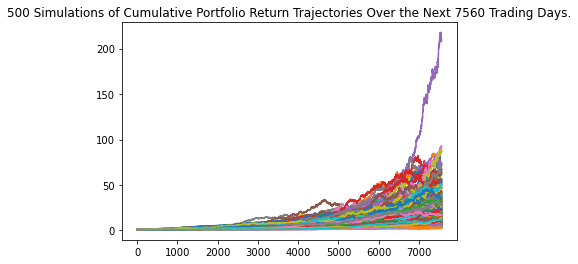

In [69]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()


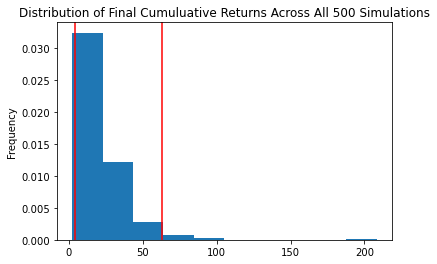

In [70]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dis_plot=MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl=MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             21.381319
std              16.881998
min               2.393223
25%              11.026072
50%              16.977941
75%              26.637881
max             208.141506
95% CI Lower      4.620713
95% CI Upper     62.846705
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [72]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower= round(tbl[8] * 20000 ,2)
ci_upper = round(tbl[9] * 20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92414.26 and $1256934.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [81]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower= round(tbl[8] * 30000 ,2)
ci_upper = round(tbl[9] * 30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138621.39 and $1885401.16


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [85]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear =MCSimulation(portfolio_data=df_stock_data, weights = [.20, .80] , num_simulation = 500 , num_trading_days = 252 * 5)

In [86]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982733,1.013499,1.006878,0.994722,0.981739,0.984831,0.998773,1.012095,1.009532,1.008098,...,1.008312,1.001978,0.997823,0.988817,1.013327,1.018804,1.004836,1.019253,0.995796,1.014065
2,0.999638,1.006249,1.002120,0.995343,0.990530,0.994033,1.016069,1.027684,1.003958,1.006513,...,1.008484,0.992790,0.999457,1.010375,1.001329,1.022180,1.000460,0.991682,0.990325,1.015114
3,1.001325,1.003414,1.011445,1.009325,1.009753,0.980118,1.027398,1.018539,0.993651,0.996957,...,1.001141,0.981942,1.002107,1.010358,0.990700,1.017295,0.999917,0.986417,1.006754,1.018953
4,0.997739,1.001426,1.013565,1.012107,0.993956,0.970404,1.033003,1.032209,0.990419,1.023489,...,0.991724,0.997505,0.976255,0.996529,0.999118,1.026327,0.991580,0.990078,1.008549,1.037278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.876619,1.956157,1.940060,1.133050,1.528537,2.366901,2.312892,2.148979,2.678492,2.289959,...,2.269755,2.170909,1.430736,1.871226,2.035583,1.241790,1.914841,1.543223,1.050132,1.811323
1257,4.949647,1.980899,1.937432,1.141952,1.537195,2.415849,2.297425,2.115200,2.678971,2.328831,...,2.258534,2.179205,1.409878,1.873442,2.039389,1.254883,1.930188,1.532484,1.052799,1.844965
1258,4.983785,1.993791,1.931147,1.135628,1.531942,2.396917,2.273822,2.135593,2.687353,2.326310,...,2.261508,2.139700,1.405368,1.889329,2.028709,1.252461,1.904730,1.488930,1.050695,1.873719
1259,5.003988,1.989508,1.935599,1.135347,1.530988,2.329910,2.301220,2.116857,2.701575,2.351380,...,2.225205,2.124217,1.404540,1.900346,2.031589,1.256705,1.910740,1.488365,1.034520,1.904551


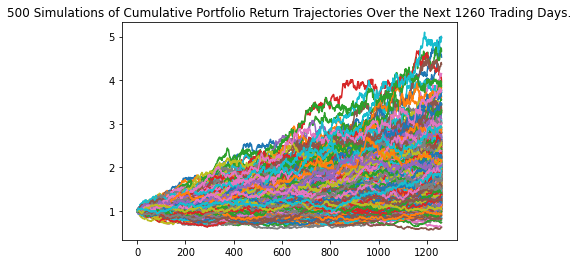

In [87]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()

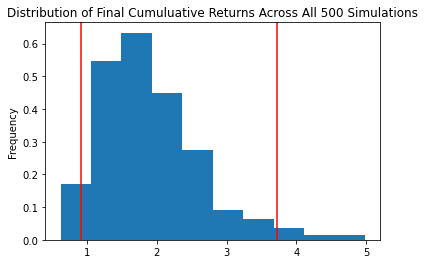

In [88]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dis_plot=MC_fiveyear.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [89]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five=MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)



count           500.000000
mean              1.901851
std               0.706561
min               0.621443
25%               1.382066
50%               1.816743
75%               2.258156
max               4.979301
95% CI Lower      0.910497
95% CI Upper      3.726313
Name: 1260, dtype: float64


In [94]:
# Set initial investment
# YOUR CODE HERE!
# Set initial investment
initial_investment = 20000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $40,000
# YOUR CODE HERE!
ci_lower= round(tbl_five[8] * 40000 ,2)
ci_upper = round(tbl_five[9] * 40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $36419.87 and $149052.52


In [96]:
# Set initial investment
# YOUR CODE HERE!
# Set initial investment
initial_investment = 20000 * 2.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000
# YOUR CODE HERE!
ci_lower= round(tbl_five[8] * 50000 ,2)
ci_upper = round(tbl_five[9] * 50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $50000.0 in the portfolio over the next 5 years will end within in the range of $45524.84 and $186315.65


In [115]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear_b =MCSimulation(portfolio_data=df_stock_data, weights = [.30, .70] , num_simulation = 500 , num_trading_days = 252 * 5)

In [116]:
MC_fiveyear_b.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016415,0.990004,1.014770,1.010098,1.009198,0.986728,0.990827,1.003576,1.003843,1.004174,...,0.988906,0.986429,0.988151,0.989284,1.003145,1.000157,0.990274,0.996732,1.004137,1.008722
2,1.009352,0.988986,1.021630,1.009601,1.011443,0.980902,0.980054,1.008247,1.018472,1.021270,...,0.986762,0.987209,0.997888,0.997341,1.001655,0.996640,0.983422,1.001308,0.993098,1.011329
3,1.018442,0.995985,1.022815,1.015304,1.001156,0.974593,0.979038,1.008981,0.994897,1.002115,...,1.000569,1.003135,0.983868,0.987690,1.011085,1.007587,0.962123,0.995758,0.987825,1.010265
4,1.013973,1.001305,1.017423,1.021987,0.996471,0.971511,0.978884,1.003557,1.000426,1.002384,...,1.002890,0.989403,0.982870,0.990052,1.016894,1.009670,0.966349,0.992756,0.985368,1.033733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.735840,1.447815,2.112319,1.031182,1.536002,2.032482,2.493997,1.710061,1.221759,1.500172,...,2.315832,1.347558,2.086815,1.838718,2.008965,2.586147,1.438865,2.136204,3.155911,2.024480
1257,1.721548,1.442559,2.088016,1.027752,1.538177,2.020362,2.499510,1.718968,1.215592,1.528554,...,2.325506,1.330333,2.082220,1.838883,1.988108,2.567547,1.438158,2.154310,3.173801,2.002498
1258,1.715233,1.475835,2.101986,1.024137,1.534633,2.036150,2.520140,1.704637,1.229930,1.506889,...,2.294446,1.315732,2.065641,1.827196,2.006855,2.541164,1.452053,2.168049,3.174168,2.022333
1259,1.714895,1.473751,2.091972,1.023520,1.536782,2.011012,2.522627,1.698315,1.219842,1.512865,...,2.306969,1.315680,2.089168,1.855102,1.984513,2.563687,1.435606,2.143280,3.191438,2.030040


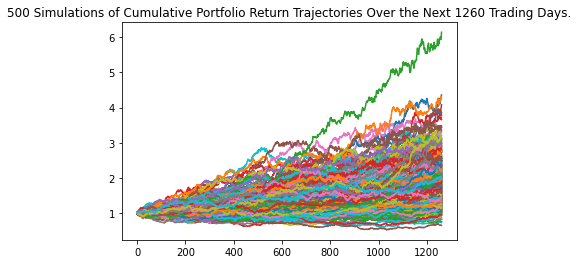

In [117]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear_b.plot_simulation()

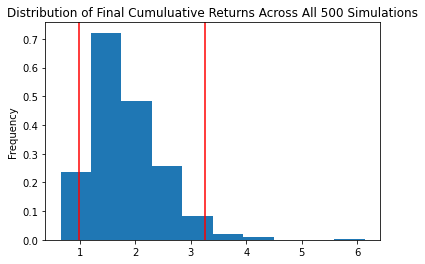

In [118]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dis_plot=MC_fiveyear_b.plot_distribution()

In [119]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five_b=MC_fiveyear_b.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)

count           500.000000
mean              1.901851
std               0.706561
min               0.621443
25%               1.382066
50%               1.816743
75%               2.258156
max               4.979301
95% CI Lower      0.910497
95% CI Upper      3.726313
Name: 1260, dtype: float64


In [120]:
# Set initial investment
# YOUR CODE HERE!
# Set initial investment
initial_investment = 20000 * 2.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000
# YOUR CODE HERE!
ci_lower= round(tbl_five_b[8] * 50000 ,2)
ci_upper = round(tbl_five_b[9] * 50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $50000.0 in the portfolio over the next 5 years will end within in the range of $48819.64 and $162496.51


### Ten Years Retirement Option

In [104]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear =MCSimulation(portfolio_data=df_stock_data, weights = [.30, .70] , num_simulation = 500 , num_trading_days = 252 * 10)

In [105]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000805,1.003687,1.014843,0.991814,1.000898,1.009521,1.003432,0.995636,0.989095,1.011326,...,0.985528,0.990638,1.002422,1.001924,0.998479,1.005540,1.005981,0.985765,1.008129,1.009571
2,1.015413,1.002962,0.998056,0.990134,0.989393,1.007541,1.012430,0.989573,0.981459,1.007498,...,0.979516,0.980907,0.994959,1.003867,0.994171,1.014351,1.003372,0.986108,1.006275,1.002172
3,1.014153,0.998053,0.992335,0.989635,1.000627,1.027956,1.023421,0.975748,0.979604,1.009166,...,0.978998,0.969446,0.991225,1.004066,0.998986,1.044155,1.010961,0.991282,1.013284,1.002714
4,1.013868,1.002364,1.007597,0.993878,1.001204,1.014147,1.020827,0.978951,0.985888,1.002121,...,0.977633,0.979090,0.988798,1.006140,0.999800,1.037556,1.020181,0.995847,1.016604,1.009798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.885481,4.574398,2.206550,3.950826,12.721452,3.611502,1.864767,2.002508,3.927160,3.792496,...,7.949101,3.107446,3.584956,2.246062,1.395572,6.191473,2.699312,2.413816,1.889830,3.069509
2517,1.889409,4.621311,2.237497,3.875596,12.616471,3.562449,1.893516,2.029141,3.961693,3.860284,...,7.821668,3.082711,3.612025,2.248985,1.395012,6.184217,2.700510,2.412911,1.862651,3.113353
2518,1.926301,4.663935,2.237616,3.841485,12.642154,3.573550,1.889925,2.027538,3.956365,3.913654,...,7.865374,3.069473,3.657505,2.217541,1.407389,6.168258,2.681285,2.396285,1.876941,3.084087
2519,1.961932,4.644906,2.220334,3.865356,12.545580,3.596578,1.868327,2.015508,3.964632,3.933328,...,7.919814,3.095813,3.665256,2.229421,1.422015,6.221053,2.663389,2.389402,1.885561,3.111294


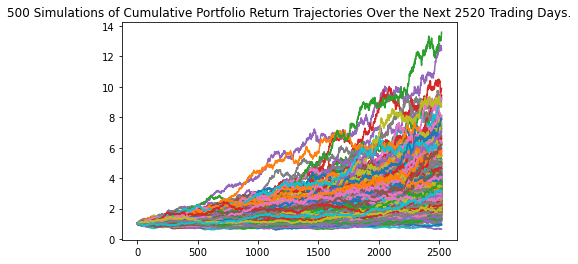

In [107]:
line_plot = MC_tenyear.plot_simulation()

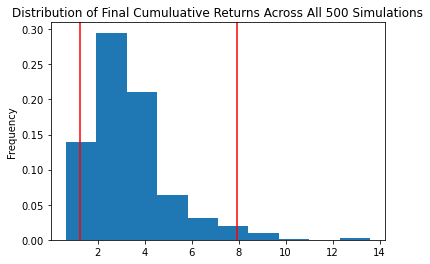

In [109]:
is_plot=MC_tenyear.plot_distribution()

In [110]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl_ten=MC_tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_ten)

count           500.000000
mean              3.348810
std               1.707243
min               0.650065
25%               2.181660
50%               3.008783
75%               4.017050
max              13.593939
95% CI Lower      1.271775
95% CI Upper      7.930443
Name: 2520, dtype: float64


In [111]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten= round(tbl_ten[8] * 60000 ,2)
ci_upper_ten = round(tbl_ten[9] * 60000,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $76306.52 and $475826.57


In [112]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $40,000
# YOUR CODE HERE!
ci_lower_ten= round(tbl_ten[8] * 40000 ,2)
ci_upper_ten = round(tbl_ten[9] * 40000,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $50871.01 and $317217.71


In [113]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower_ten= round(tbl_ten[8] * 20000 ,2)
ci_upper_ten = round(tbl_ten[9] * 20000,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $25435.51 and $158608.86
